In [1]:
import pandas as pd
import numpy as np

#show whole columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#read the dataset
df = pd.read_csv('D1.csv')

#show all columns information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   region                  1485 non-null   object 
 2   country                 5109 non-null   object 
 3   ip_latitude             5111 non-null   float64
 4   ip_longitude            5111 non-null   float64
 5   ip_accuracy             5111 non-null   int64  
 6   gender                  5111 non-null   object 
 7   age                     5111 non-null   object 
 8   height                  5111 non-null   int64  
 9   weight                  5111 non-null   int64  
 10  bmi                     5111 non-null   float64
 11  blood_type              5111 non-null   object 
 12  insurance               3943 non-null   object 
 13  income                  3943 non-null   object 
 14  race                    3943 non-null   

# Question 1 Correct the data type

In [2]:
#Correct insurance to bool type by mapping
insurance_map = {'no': False, 'yes': True}
df['insurance'] = df['insurance'].map(insurance_map)

#Correct immigrant to bool type by mapping
immigrant_map = {'native': False, 'immigrant': True}
df['immigrant'] = df['immigrant'].map(immigrant_map)

#Correct worried to object and make'nan' string to nan
df['worried'] = df['worried'].astype(str).replace('nan',np.nan)

#Correct the rest binary variable to bool type
df['covid19_positive'] = df['covid19_positive'].astype(bool)
df['covid19_symptoms'] = df['covid19_symptoms'].astype(bool)
df['covid19_contact'] = df['covid19_contact'].astype(bool)
df['asthma'] = df['asthma'].astype(bool)
df['kidney_disease'] = df['kidney_disease'].astype(bool)
df['liver_disease'] = df['liver_disease'].astype(bool)
df['compromised_immune'] = df['compromised_immune'].astype(bool)
df['heart_disease'] = df['heart_disease'].astype(bool)
df['lung_disease'] = df['lung_disease'].astype(bool)
df['diabetes'] = df['diabetes'].astype(bool)
df['hiv_positive'] = df['hiv_positive'].astype(bool)
df['hypertension'] = df['hypertension'].astype(bool)
df['other_chronic'] = df['other_chronic'].astype(bool)
df['nursing_home'] = df['nursing_home'].astype(bool)
df['health_worker'] = df['health_worker'].astype(bool)

#show all columns information after correction
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   region                  1485 non-null   object 
 2   country                 5109 non-null   object 
 3   ip_latitude             5111 non-null   float64
 4   ip_longitude            5111 non-null   float64
 5   ip_accuracy             5111 non-null   int64  
 6   gender                  5111 non-null   object 
 7   age                     5111 non-null   object 
 8   height                  5111 non-null   int64  
 9   weight                  5111 non-null   int64  
 10  bmi                     5111 non-null   float64
 11  blood_type              5111 non-null   object 
 12  insurance               3687 non-null   object 
 13  income                  3943 non-null   object 
 14  race                    3943 non-null   

# Question 2.1 Identify the skewness

In [3]:
#select only the numeric variables from the dataset
df2 = df.select_dtypes(include=[np.number])

#print for each mean's numeric variables
print("MEAN")
print(df2.mean())
print("\n")

#print for each median's numeric variables
print("MEDIAN")
print(df2.median())
print("\n")

#print for each mode's numeric variables
print("MODE")
print(df2.mode()[0:1])
print("\n")

MEAN
ip_latitude                32.632466
ip_longitude              -62.937803
ip_accuracy                95.045001
height                    171.915085
weight                     83.771082
bmi                        28.269086
contacts_count              7.541757
house_count                 2.998630
public_transport_count      0.343393
risk_infection             44.264527
risk_mortality              0.897149
dtype: float64


MEDIAN
ip_latitude                39.0034
ip_longitude              -80.1511
ip_accuracy                10.0000
height                    172.0000
weight                     80.0000
bmi                        26.5000
contacts_count              5.0000
house_count                 3.0000
public_transport_count      0.0000
risk_infection             13.0000
risk_mortality              0.1940
dtype: float64


MODE
   ip_latitude  ip_longitude  ip_accuracy  height  weight   bmi  \
0      41.9737      -77.0806            5     178      74  27.7   

   contacts_count  hou

In [4]:
#select only the categorical variables from dataset
df2 = df.select_dtypes(exclude=[np.number])

#print the value counts for each categorical variables
for column_name in df2.columns.values.tolist():
    print(column_name)
    print(df[column_name].value_counts())
    print("\n")

survey_date
6/07/2020     919
7/07/2020     678
5/07/2020     545
2/07/2020     227
8/07/2020     220
4/07/2020     208
6/04/2020     205
1/07/2020     191
3/07/2020     191
5/04/2020     175
7/04/2020     165
8/04/2020     111
30/06/2020    107
4/04/2020     100
29/06/2020     68
9/04/2020      49
17/05/2020     47
15/04/2020     34
3/04/2020      34
11/04/2020     32
18/05/2020     32
16/05/2020     29
10/04/2020     23
28/06/2020     22
12/04/2020     21
19/06/2020     20
27/06/2020     20
16/04/2020     20
26/03/2020     19
14/04/2020     19
21/05/2020     19
14/05/2020     18
19/05/2020     18
20/05/2020     17
24/06/2020     17
15/05/2020     16
20/06/2020     16
28/04/2020     15
25/03/2020     14
7/05/2020      14
13/04/2020     13
27/04/2020     13
23/05/2020     13
13/05/2020     12
17/06/2020     12
26/05/2020     11
22/05/2020     11
22/06/2020     11
25/06/2020     11
2/04/2020      10
26/06/2020     10
31/05/2020      9
17/04/2020      9
25/05/2020      9
18/06/2020      

# Question 2.2 List the inconsistencies or errors in the dataset

In [5]:
#show all the unique values for each variables
for column_name in df.columns.values.tolist():
    print(column_name)
    print(df[column_name].unique())
    print("\n")

survey_date
['25/03/2020' '26/03/2020' '28/03/2020' '27/03/2020' '31/03/2020'
 '1/04/2020' '5/04/2020' '4/04/2020' '3/04/2020' '2/04/2020' '30/03/2020'
 '7/04/2020' '6/04/2020' '8/04/2020' '9/04/2020' '20/04/2020' '3/05/2020'
 '7/05/2020' '6/05/2020' '28/04/2020' '18/05/2020' '17/05/2020'
 '22/04/2020' '24/04/2020' '23/04/2020' '8/05/2020' '16/05/2020'
 '14/05/2020' '12/04/2020' '19/05/2020' '19/04/2020' '14/04/2020'
 '15/05/2020' '29/04/2020' '27/04/2020' '2/05/2020' '12/05/2020'
 '26/04/2020' '11/05/2020' '25/04/2020' '4/05/2020' '16/04/2020'
 '15/04/2020' '11/04/2020' '29/03/2020' '18/04/2020' '10/04/2020'
 '17/04/2020' '13/04/2020' '23/05/2020' '25/05/2020' '21/05/2020'
 '24/05/2020' '20/05/2020' '22/06/2020' '23/06/2020' '24/06/2020'
 '25/06/2020' '26/06/2020' '27/06/2020' '28/06/2020' '29/06/2020'
 '30/06/2020' '1/07/2020' '26/05/2020' '29/05/2020' '30/05/2020'
 '7/06/2020' '8/06/2020' '10/06/2020' '11/06/2020' '17/06/2020'
 '18/06/2020' '20/06/2020' '19/06/2020' '2/07/2020' '27/

# Question 2.3 Answer the following questions

a) What is the average contacts_count of a patient from the US who is COVID-19 positive?

In [6]:
US_contact_count_with_positive_covid19 = df[(df['country'] == 'US') & (df['covid19_positive'] == True)]['contacts_count'].mean()
print("2.3a. Average contacts_count of a patient from the US who is COVID-19 positive = " + 
      str(US_contact_count_with_positive_covid19))

2.3a. Average contacts_count of a patient from the US who is COVID-19 positive = 8.398163606010018


b) Which country has the highest number of covid19_positive?

In [7]:
#find the highest number of covid19_positive
highest_number = df[df['covid19_positive'] == True].groupby(['country'])['covid19_positive'].count().max()

#find the covid19_positive count for each country
data_count = df[df['covid19_positive'] == True].groupby(['country'], as_index=False)['covid19_positive'].count()

#show the countries that have the highest number of covid19_positive
list_countries_with_highest_covid = data_count[data_count['covid19_positive'] == highest_number]['country'].to_list()
print("2.3b. Country which has the highest number of covid19_positive = ", end = "")
for country in list_countries_with_highest_covid:
    print(country + " " , end = "")

2.3b. Country which has the highest number of covid19_positive = US 

c) How many health workers in the dataset? and how many of them are covid19 positive? 

In [8]:
#find the health_worker count
health_worker_count = df[df['health_worker'] == True]['health_worker'].count()

#find the health_worker count who got covid19_positive
health_worker_with_positive_covid19 = df[(df['health_worker'] == True) & (df['covid19_positive'] == True)]['health_worker'].count()
print("2.3c. There are " + str(health_worker_count) + " health workers in dataset and " + 
      str(health_worker_with_positive_covid19) + " of them are COVID19 positive")

2.3c. There are 314 health workers in dataset and 121 of them are COVID19 positive


d) Which are the top-five countries according to the average mortality risk? 

In [9]:
print("2.3d. Top-five countries according to the average mortality risk")
print(df.groupby(['country'], as_index=False)['risk_mortality'].mean().nlargest(5, 'risk_mortality').reset_index(drop=True))

2.3d. Top-five countries according to the average mortality risk
  country  risk_mortality
0      IT       10.031844
1      AD        3.994000
2      PT        3.603583
3      AM        3.291000
4      NZ        3.143556


# Question 3.1 Identify data quality problems

1. height


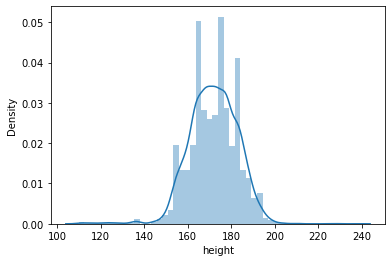

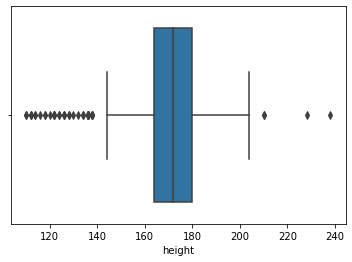



2. weight


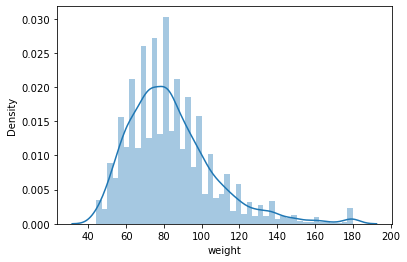

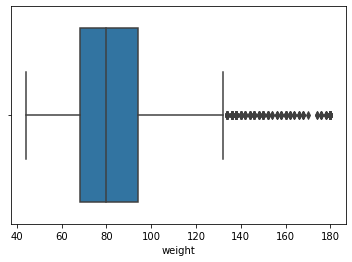



3. bmi


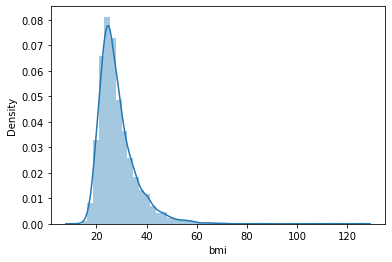

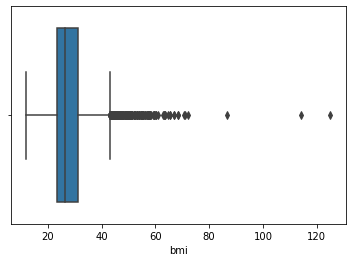



4. contacts_count


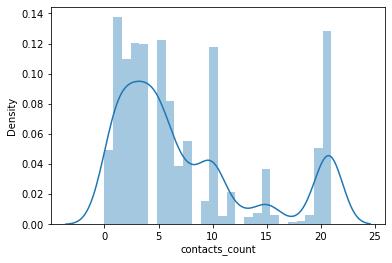

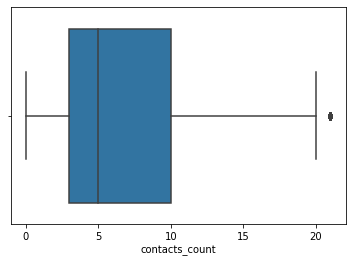



5. house_count


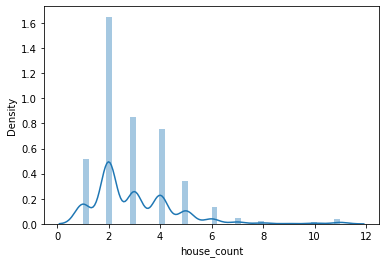

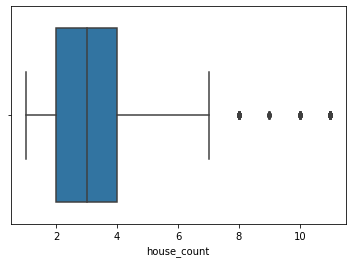



6. public_transport_count


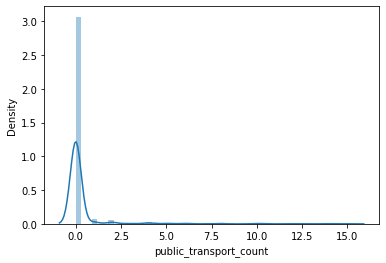

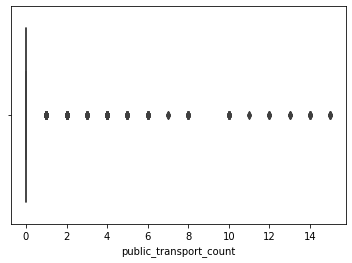



7. risk_infection


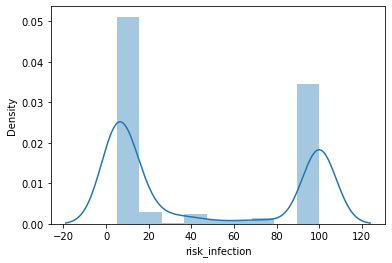

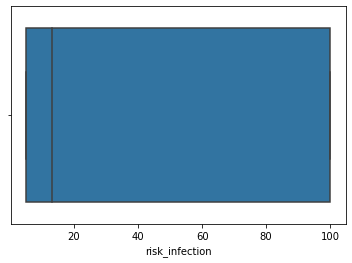



8. risk_mortality


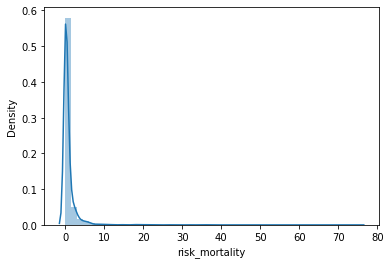

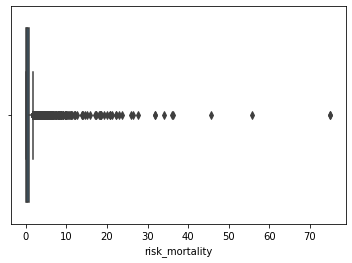

In [10]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

#select only the numeric variables from the dataset
df2 = df.select_dtypes(include=[np.number])

# 'ip_latitude', 'ip_longitude', 'ip_accuracy' are dropped because
# looking their distribution individually is not meaningful
df2 = df2.drop(['ip_latitude', 'ip_longitude', 'ip_accuracy'], axis=1);

#show the distplot and boxplot for each numeric variables
idx = 1
for column_name in df2.columns.values.tolist():
    print(str(idx) + '. ' + column_name)
    d = sns.distplot(df[column_name])
    plt.show()
    b = sns.boxplot(df[column_name])
    plt.show()
    idx = idx + 1
    print('\n')

1. survey_date


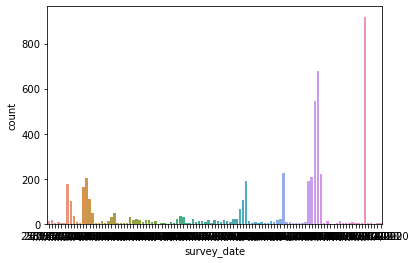



2. region


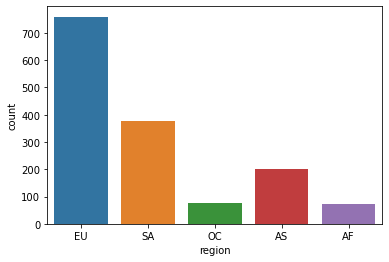



3. country


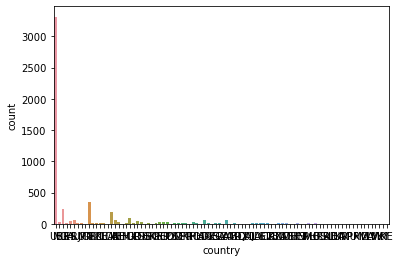



4. gender


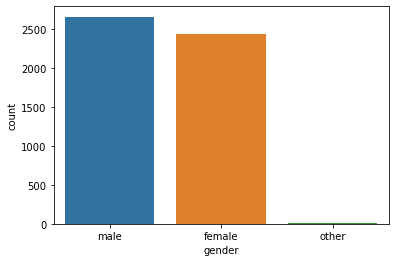



5. age


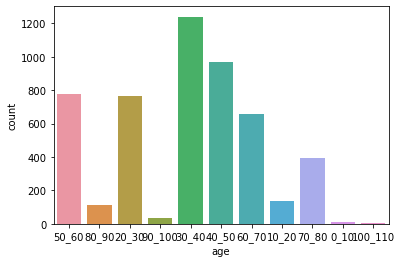



6. blood_type


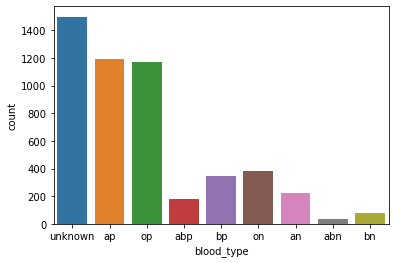



7. insurance


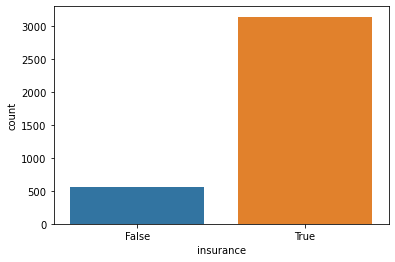



8. income


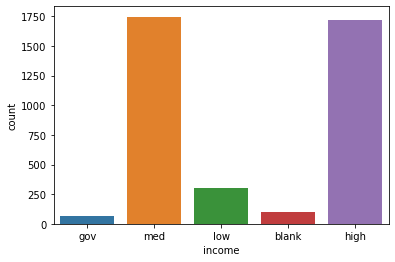



9. race


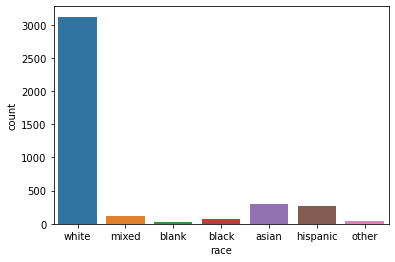



10. immigrant


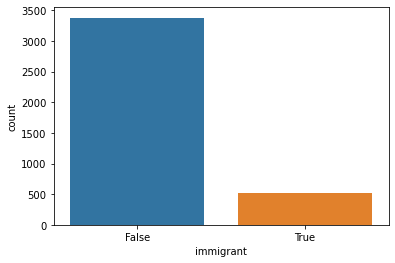



11. smoking


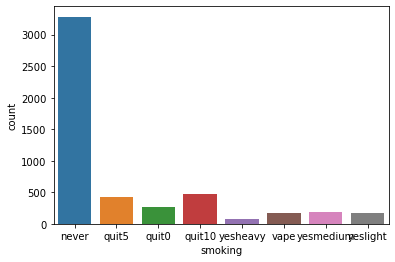



12. working


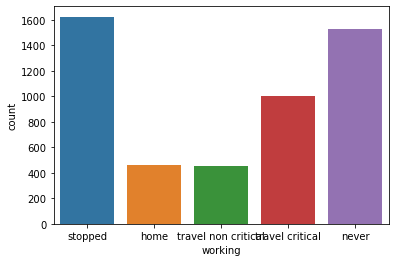



13. worried


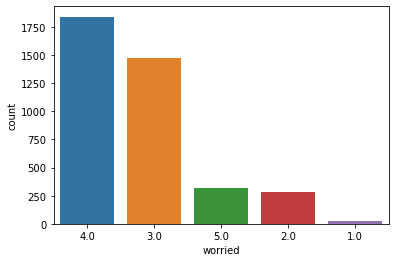



14. covid19_positive


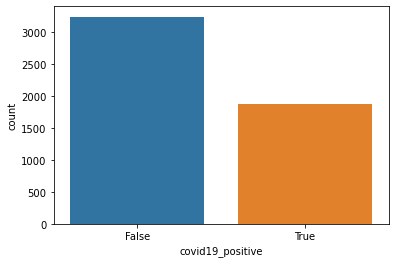



15. covid19_symptoms


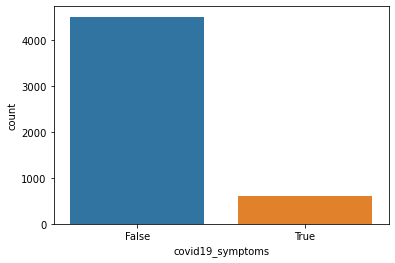



16. covid19_contact


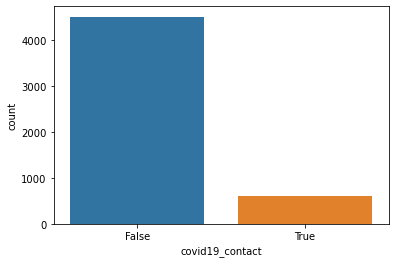



17. asthma


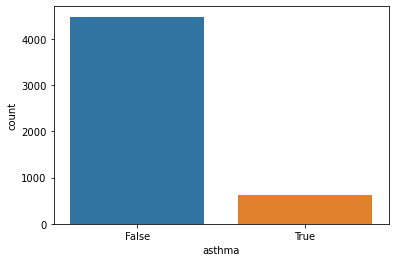



18. kidney_disease


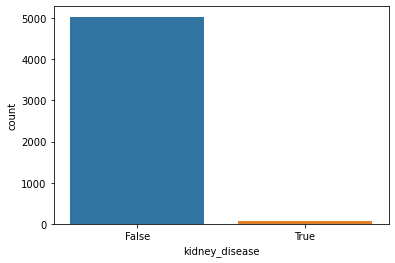



19. liver_disease


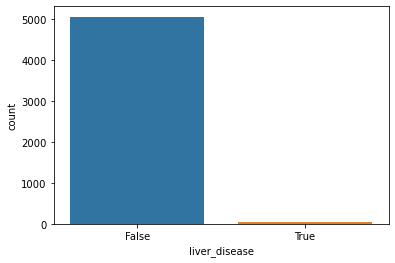



20. compromised_immune


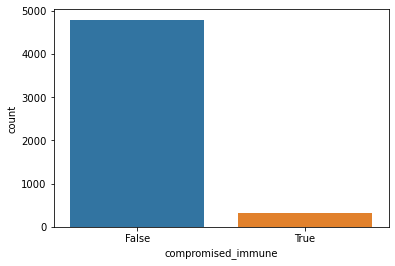



21. heart_disease


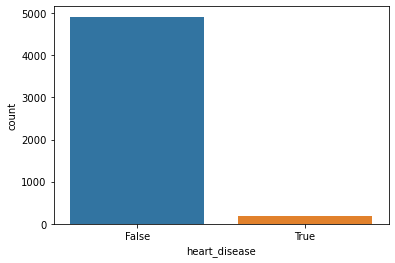



22. lung_disease


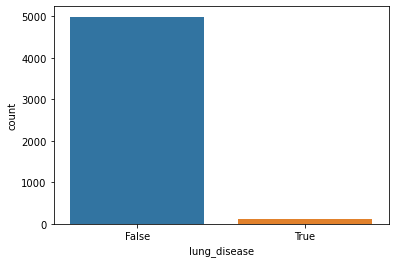



23. diabetes


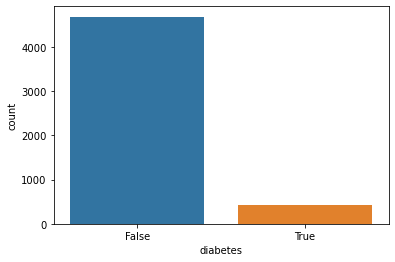



24. hiv_positive


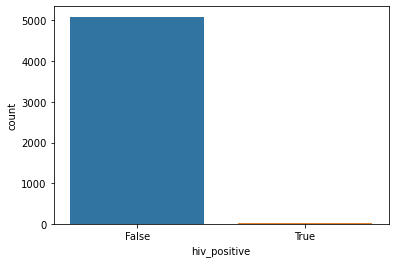



25. hypertension


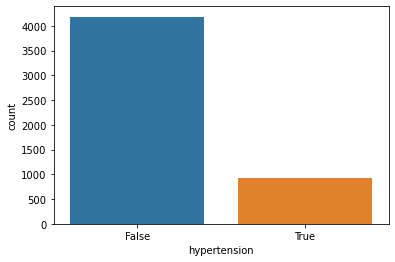



26. other_chronic


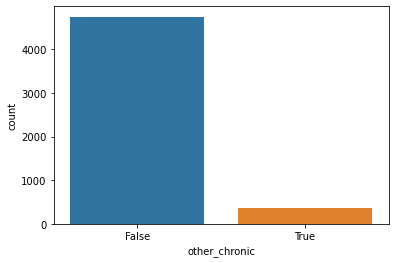



27. nursing_home


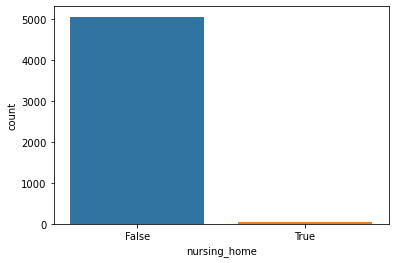



28. health_worker


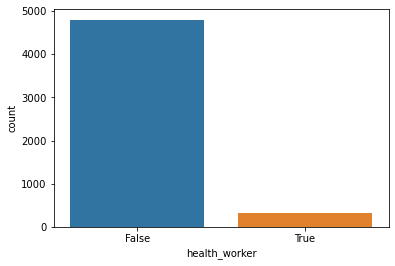

In [11]:
#select only the categorical variables from the dataset
df2 = df.select_dtypes(exclude=[np.number])

#show the count plot for each categorical variables
idx = 1
for column_name in df2.columns.values.tolist():
    print(str(idx) + '. ' + column_name)
    c = sns.countplot(df[column_name])
    plt.show()
    idx = idx + 1
    print("\n")

# Question 3.2 Relationship between the variables risk_infection and covid19_positive

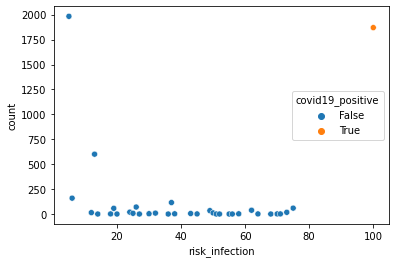

In [12]:
#Find the risk_infection's value_count grouped by the covid19_positive
df2 = df.groupby(['covid19_positive'])['risk_infection'].value_counts().reset_index(name="count")

#show the scatter plot using the new dataframe which included the value_count
sns.scatterplot(data=df2, x="risk_infection", y="count", hue="covid19_positive")
plt.show()

# Question 3.3 Identify the highly correlated variable pairs

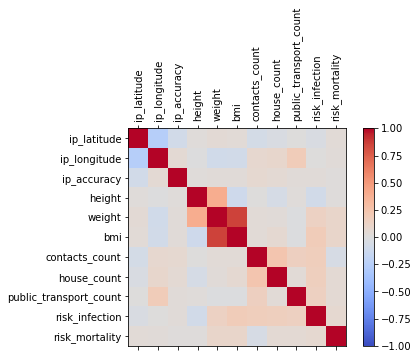

In [13]:
#select only the numeric variables from the dataset
df2 = df.select_dtypes(include=[np.number])

corr = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

# Question 4.3 Data Preparation

In [14]:
def preprocess_data(df):
    #Q4.2f & g drop risk_infection & bmi
    df = df.drop(['risk_infection', 'bmi'], axis=1)
    
    #Q4.2e drop country's rows which have missing value
    mask = pd.isnull(df['country'])
    df = df[~mask]
    
    #get the column names for numeric and categorical variables
    df_numeric = df.select_dtypes(include=[np.number])
    df_categorical = df.select_dtypes(exclude=[np.number])
    list_numeric_column_name = df_numeric.columns.values.tolist()
    list_categorical_column_name = df_categorical.columns.values.tolist()

    #Q4.2b replace nan values with NA
    df["region"].fillna("NA", inplace=True)
    
    #Q4.2c replace blank values with nan
    df['income'].replace(['blank'], np.nan, inplace=True)
    df['race'].replace(['blank'], np.nan, inplace=True)
    
    #Q4.2e replace missing values using median for numeric variables
    for column_name in list_numeric_column_name:
        df[column_name].fillna(df[column_name].median(), inplace=True)

    #Q4.2e replace missing values using mode for categorical variables
    for column_name in list_categorical_column_name:
        df[column_name].fillna(df[column_name].mode()[0], inplace=True)
    
    #Q4.2a correct the data types
    df['immigrant'] = df['immigrant'].astype(bool)
    df['insurance'] = df['insurance'].astype(bool) 
    df['contacts_count'] = df['contacts_count'].astype('int64')
    df['public_transport_count'] = df['public_transport_count'].astype('int64')
    
    #Q4.2h change survey_date into survey_week and survey_month
    df['survey_week'] = pd.to_datetime(df['survey_date']).dt.week
    df['survey_month'] = pd.to_datetime(df['survey_date']).dt.month
    
    #drop the survey_date, not required anymore
    df = df.drop(['survey_date'], axis=1)
    

    df = pd.get_dummies(df)
    return df

In [15]:
df2 = preprocess_data(df)

#show the final dataset info after all pre-processing
df2.info()

#convert to csv file
df2.to_csv('D1-processed.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5110
Columns: 175 entries, ip_latitude to worried_5.0
dtypes: bool(17), float64(3), int64(8), uint8(147)
memory usage: 1.3 MB


# Question 5.2  Variables will be included in this data mining task

In [16]:
#find correlation for all variables using spearman
df = pd.read_csv('D1.csv')
country_map = {}
survey_date_map = {}
i = 0

df["region"].fillna("NA", inplace=True)

for country_name in df['country'].unique():
    country_map[country_name] =i
    i+=1

i = 0
for date in df['survey_date'].unique():
    survey_date_map[date] = i
    i+=1
    
region_map={'NA':0, 'EU':1, 'SA':2, 'OC':3, 'AS':4, 'AF':5}
gender_map={'male':1, 'female':0}
age_map={'0_10':0, '10_20':1, '20_30':2, '30_40':3, '40_50':4, '50_60':5, '60_70':6, '80_90':7, '90_100':8}
blood_type_map={'ap':0, 'bp':1, 'op':2, 'abp':3, 'unknown':4}
income_map={'blank':0, 'low':1, 'med':2, 'high':3, 'gov':4}
race_map={'blank':0, 'black':1, 'asian':2, 'white':3, 'hispanic':4}
smoking_map={'never':0, 'quit10':1,'quit5':2, 'quit0':3, 'yeslight':4,'yesmedium':5,'yesheavy':6}
working_map={'stopped':0, 'home':1,'travel non critical':2, 'travel critical':3}


df2=df
df2['survey_date'] = df['survey_date'].map(survey_date_map)
df2['country']=df['country'].map(country_map)
df2['region']=df['region'].map(region_map)
df2['age']=df['age'].map(age_map)
df2['blood_type']=df['blood_type'].map(blood_type_map)
df2['income']=df['income'].map(income_map)
df2['race']=df['race'].map(race_map)
df2['smoking']=df['smoking'].map(smoking_map)
df2['working']=df['working'].map(working_map)

df2.corr(method='spearman')

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,age,height,weight,bmi,blood_type,income,race,smoking,contacts_count,house_count,public_transport_count,working,worried,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
survey_date,1.000000,0.019127,0.051868,0.024859,0.025746,-0.047377,0.145764,0.075305,-0.109072,-0.161996,-0.041122,0.131226,-0.019562,-0.072913,-0.046841,-0.091009,-0.036673,-0.124094,0.093109,-0.721614,-0.322938,-0.276522,-0.087489,-0.039653,-0.000467,-0.062997,-0.032796,-0.011958,-0.058519,-0.036404,0.002174,-0.067202,-0.026414,0.021124,-0.657805,0.136037
region,0.019127,1.000000,0.817097,-0.140277,0.759901,0.167213,-0.023761,0.019997,-0.107902,-0.124194,-0.119608,0.019044,-0.165551,0.087830,0.073940,0.084614,0.182904,0.063471,-0.090880,0.015343,-0.014205,-0.037723,-0.041180,0.024579,0.043734,-0.015901,0.019082,0.009836,-0.020443,0.032650,-0.013982,-0.013388,0.027139,0.052945,0.051194,-0.025500
country,0.051868,0.817097,1.000000,0.000124,0.634503,0.115974,-0.015150,0.012332,-0.113619,-0.127228,-0.112511,0.022849,-0.035121,0.101758,0.070270,0.097370,0.175593,0.043738,-0.105748,-0.031820,-0.017270,-0.054179,-0.052330,0.028794,0.058314,-0.012535,0.023118,0.012607,-0.005351,0.017787,-0.017772,-0.012527,0.033297,0.039827,0.002571,-0.010651
ip_latitude,0.024859,-0.140277,0.000124,1.000000,0.074190,-0.118197,0.048802,0.022684,0.007349,-0.014413,0.116441,-0.041008,-0.041351,0.004369,-0.033057,-0.054721,0.041418,-0.063816,-0.009754,-0.022907,-0.022044,-0.013345,0.042812,0.029830,0.024379,0.041686,0.022964,0.006722,-0.009193,0.009738,-0.023001,0.023695,0.022113,-0.036237,-0.039439,0.024228
ip_longitude,0.025746,0.759901,0.634503,0.074190,1.000000,0.061564,-0.036250,0.003769,-0.089892,-0.097578,-0.064171,0.015318,-0.180231,0.073291,0.060341,0.059573,0.185963,0.017410,-0.077758,0.027871,-0.005767,-0.019812,-0.029156,0.026539,0.043142,0.000454,0.021464,0.011595,-0.021024,0.024710,-0.018342,-0.006578,0.018965,0.043323,0.052469,-0.037085
ip_accuracy,-0.047377,0.167213,0.115974,-0.118197,0.061564,1.000000,-0.043380,0.026765,0.048491,0.040570,-0.030889,-0.063901,-0.003261,0.034936,0.101079,0.054294,0.028676,0.141940,-0.046768,0.051734,0.018032,0.007705,-0.016189,0.016357,0.008756,-0.013963,0.010230,-0.007885,-0.005582,0.008449,0.019448,-0.025473,-0.012118,0.061581,0.090444,-0.038077
age,0.145764,-0.023761,-0.015150,0.048802,-0.036250,-0.043380,1.000000,0.052361,0.107164,0.101098,-0.071707,0.123541,-0.000239,0.020830,-0.149237,-0.099626,-0.113598,-0.021393,-0.010903,-0.118209,-0.100951,-0.130578,-0.060381,0.080232,0.055046,0.068053,0.171693,0.072181,0.193803,-0.008843,0.277768,0.048607,0.108538,-0.030947,-0.130535,0.883230
height,0.075305,0.019997,0.012332,0.022684,0.003769,0.026765,0.052361,1.000000,0.471034,0.014957,0.044943,0.114544,0.052773,0.040545,0.005362,-0.038442,0.009813,-0.010872,-0.072531,-0.085066,-0.052018,-0.033407,-0.080126,0.001244,-0.014862,-0.078747,0.034942,-0.006148,0.003655,0.004594,0.054156,-0.077409,-0.058319,-0.042471,-0.072947,0.123758
weight,-0.109072,-0.107902,-0.113619,0.007349,-0.089892,0.048491,0.107164,0.471034,1.000000,0.859623,0.009140,-0.020837,0.069093,0.081923,0.027632,0.021410,-0.040445,0.058556,0.020759,0.106334,0.087050,0.069718,0.044031,0.024195,0.022201,-0.010410,0.064777,0.031014,0.175610,0.033017,0.228449,-0.009029,-0.073246,-0.005121,0.121052,0.213813
bmi,-0.161996,-0.124194,-0.127228,-0.014413,-0.097578,0.040570,0.101098,0.014957,0.859623,1.000000,-0.014984,-0.086730,0.051064,0.073952,0.027212,0.049338,-0.052198,0.075242,0.061262,0.157420,0.124798,0.095142,0.085745,0.029269,0.027955,0.020225,0.056775,0.038553,0.201087,0.039791,0.235703,0.023132,-0.054602,0.012200,0.169198,0.188824
